# Explorative Datenanalyse

*Know your data!* Wichtig bei der Arbeit mit Daten ist es, diese gut zu kennen. Pandas ist dabei äußerst hilfreich, um mit wenig Code erste Einsichten in seine Daten zu bekommen. Daher werden im folgenden Abschnitt einige Herangehensweisen vorgestellt, wie mit pandas Daten erkundet werden können. 

In [1]:
import pandas as pd

Am Anfang steht das Einlesen der Daten - und die Umwandlung der Datentypen in das richtige Format. Wir lesen diesmal die JSON-Datei ein und wandeln die dort enthaltene unix-Zeit in ein Datetime-Objekt um.

In [2]:
df = pd.read_json('240301-AvH-letters-with-tokens.json')
df.loc[:, 'date'] = pd.to_datetime(df.loc[:, 'date'], unit='ms')

In [3]:
print(df.shape)
df.head()

(296, 12)


,reference,edition_id,sender_id,sender,receiver_id,receiver,date,place_id,place,text,token,nr_token
0,https://edition-humboldt.de/H0002655,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1793-12-05,http://sws.geonames.org/6556797,Berg,"Berg , den 5 . Dez Dezember 1793 Ihr Brief, li...","[berg, den, 5, dez, dezember, 1793, ihr, brief...",252
1,https://edition-humboldt.de/H0002730,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1794-02-06,http://sws.geonames.org/2951825,Bayreuth,"Der Ueberbringer dieses Briefchens, lieber Soe...","[der, ueberbringer, dieses, briefchens, lieber...",143
2,https://edition-humboldt.de/H0002729,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1795-06-07,http://sws.geonames.org/2951825,Bayreuth,"Verehrungswerther Freund, Ich will Ihnen ein B...","[verehrungswerther, freund, ich, will, ihnen, ...",591
3,https://edition-humboldt.de/H0002657,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1795-06-29,http://sws.geonames.org/2919290,Goldkronach,"Wie innig, theurer, Verehrungswerther Mann! fr...","[wie, innig, theurer, verehrungswerther, mann,...",899
4,https://edition-humboldt.de/H0001183,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/117387436,Karl Ludwig Willdenow,1795-07-17,http://sws.geonames.org/2951825,Bayreuth,"ich reise noch heute von hier nach Venedig , d...","[ich, reise, noch, heute, von, hier, nach, ven...",143


## Infos zum Dataframe

Schauen wir uns die Titel der Spalten an:

In [4]:
df.columns

Index(['reference', 'edition_id', 'sender_id', 'sender', 'receiver_id',
       'receiver', 'date', 'place_id', 'place', 'text', 'token', 'nr_token'],
      dtype='object')

Und dann geben wir Infos zu allen Spalten ausgeben, um Angaben zu den Datentypen zu erhalten. Bis auf zwei Spalten ist der Datentype als 'object' ausgewiesen. D.h. hier sind strings in den Spalten vorhanden. Bei `date` haben wir ein Datetime-Objekt erstellt, bei `nr_token` handelt es sich um integers. Auch die Angabe über fehlende Werte ist ersichtlich, die wir aber in der darauffolgenden Zelle nochmal einfacher darstellen lassen können.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 295
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   reference    296 non-null    object        
 1   edition_id   296 non-null    object        
 2   sender_id    296 non-null    object        
 3   sender       296 non-null    object        
 4   receiver_id  296 non-null    object        
 5   receiver     296 non-null    object        
 6   date         296 non-null    datetime64[ns]
 7   place_id     283 non-null    object        
 8   place        82 non-null     object        
 9   text         296 non-null    object        
 10  token        296 non-null    object        
 11  nr_token     296 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 30.1+ KB


In [6]:
df.isna().sum()

reference        0
edition_id       0
sender_id        0
sender           0
receiver_id      0
receiver         0
date             0
place_id        13
place          214
text             0
token            0
nr_token         0
dtype: int64

Zu den Spalten mit numerischen Werten können wir Informationen über die Verteilung der Daten aufrufen. In unserem Beispiel haben wir allerdings nur eine Spalte mit numerischen Werten, die Auskunft über die Anzahl der Token in den Briefen gibt. Im Durchschnitt besteht ein Brief aus 388 Token, während der längste Brief 4347 Token umfasst.

In [7]:
df.describe()

,nr_token
count,296.000000
mean,388.266892
std,474.315521
min,0.000000
25%,124.750000
50%,224.500000
75%,484.750000
max,4347.000000


## Infos zu einzelnen Spalten

Mit `nunique()` können wir die Anzahl der einmalig auftretenden Werte ausgeben, mit `unique()` können wir die Wert selbst aufrufen. Dies führen wir für die Spalten `edition_id`, `sender`, `receiver` und `place` mit Hilfe einer for-Schleife durch.

In [8]:
for col in ['edition_id', 'sender', 'receiver', 'place']:

    print(col)
    print(df.loc[:, col].nunique())
    print(df.loc[:, col].unique())
    print('###\n')

edition_id
1
['#AVHR']
###

sender
14
['Alexander von Humboldt' 'Aimé Bonpland' 'Aylmer Bourke Lambert'
 'George Arnott Walker-Arnott' 'Johann Moritz Rugendas'
 'Christian Gottfried Ehrenberg' 'Carl Sigismund Kunth'
 'Sir Robert Hermann Schomburgk' 'Moritz Richard Schomburgk'
 'Joseph Dalton Hooker' 'Otto Alfred Schomburgk'
 'Hermann Schlagintweit-Sakünlünski' 'Adolph von Schlagintweit'
 'Robert, Freiherr von Schlagintweit']
###

receiver
18
['Samuel Thomas von Soemmerring' 'Karl Ludwig Willdenow'
 'Dietrich Ludwig Gustav Karsten' 'Carl Sigismund Kunth'
 'Christian Gottfried Ehrenberg' 'Alexander von Humboldt'
 'Johann Moritz Rugendas' 'Karl Christian Gmelin'
 'Franz Julius Ferdinand Meyen' 'Adolphe Graf von Polier'
 'Karl Friedrich Schinkel' 'Friedrich Wilhelm IV., König von Preußen'
 'Joseph Dalton Hooker' 'Sir Robert Hermann Schomburgk'
 'Otto Alfred Schomburgk' 'Adolph von Schlagintweit'
 'Hermann Schlagintweit-Sakünlünski' 'Robert, Freiherr von Schlagintweit']
###

place
27
['Berg

## Schnelle Visualisierungen mit pandas

Mit pandas können wir schnell auch erste Visualisierungen plotten. Allerdings: Die Darstellung geht natürlich noch besser - das werden wir im Kapitel zur Visualisierung von Daten ausführlicher besprechen. Bspw. ist bei den folgenden 'schnellen' Visualisierungen zur ersten Exploration der Daten die Reihenfolge der horizontalen Balken verkehrt herum. Auch die Abstände zwischen den Jahreszahlen, die als Label auf der x-Achse stehen, sind viel zu eng. Vieles lässt sich anpassen, das werden wir - wie gesagt -  im nächsten Kapitel vorstellen.

### Balkendiagramm

In den folgenden drei Balkendiagrammen zeigen wir die 5 häufigsten Orte, von denen Briefe verschickt wurden, sowie die 5 häufigsten Verfasser und Empfänger der Briefe an. Dazu nutzen wir die Methode `value_counts()` auf die jeweilige Spalte und weisen die Rückgabe einer neuen Variablen zu, die wir wiederum nutzen, um das Ergebnis zu plotten. Wir nutzen mit `head()` nur die ersten 5 Ergebnisse. Mit dem Argument `kind='barh'` geben wir an, dass wir die Darstellung in einem horizontalen Balkendiagramm ausgeben wollen. Mit `title=` geben wir an, welche Überschrift das Diagramm erhalten soll.

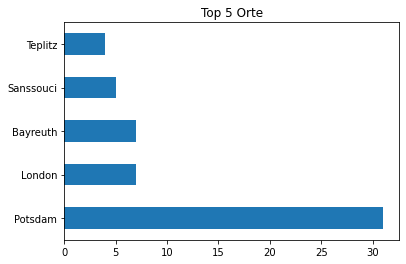

In [120]:
df_top_places = df.loc[:, 'place'].value_counts()

df_top_places.head(5).plot(kind='barh', title='Top 5 Orte');

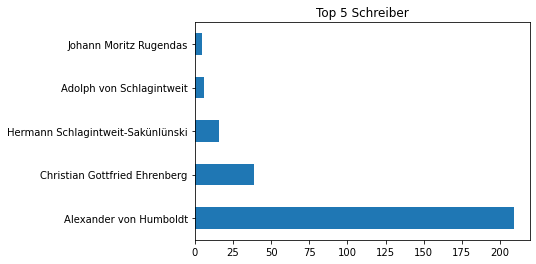

In [60]:
df_top_sender = df.loc[:, 'sender'].value_counts()

df_top_sender.head(5).plot(kind='barh', title='Top 5 Schreiber');

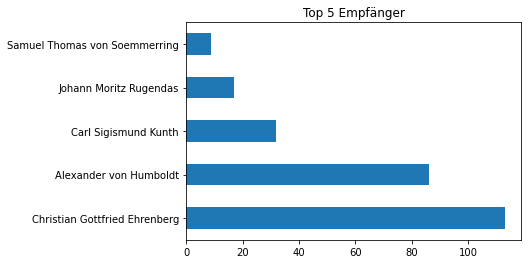

In [61]:
df_top_receiver = df.loc[:, 'receiver'].value_counts()

df_top_receiver.head(5).plot(kind='barh', title='Top 5 Empfänger');

### Histogramm

Mit nur einer Codezeile können wir ein Histogramm plotten, das Auskunft über die Verteilung der Länge der Briefe gibt. Wir wählen dazu die Spalte mit den Anzahl der Token aus und nutzen `plot()` mit dem Parameter `hist` und `bins=30`, um die Werte der Textlänge in 30 gleichgroße Abschnitte einteilen zu lassen.

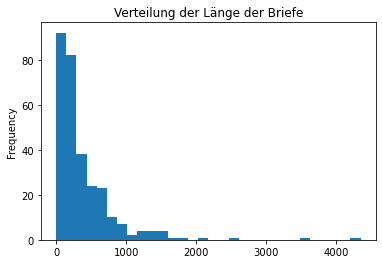

In [62]:
df.loc[:, 'nr_token' ].plot(kind='hist', bins=30, title='Verteilung der Länge der Briefe');

### Gruppieren

Wenn wir wissen wollen, wie viele Briefe (aus unserem in Auswahl zusammengestellten Korpus) in den jeweiligen Jahren verfasst wurden, können wir diese mit der Methode `groupby()` entsprechend gruppieren. Die Gruppierung führen wir auf der Datums-Spalte aus. Wir nutzen dann die Methode `dt.to_period('Y')`, um auf der Datumsangabe nach einer 'Periode', in diesem Fall das Jahr, das wir mit 'Y' angeben, zu gruppieren. Die Abkürzung `dt` gibt dabei an, dass wir mit Datetime-Objekten arbeiten. Neben 'Y' könnten wir auch 'M' für die Monate nutzen. Schließlich nutzen wir `size()`, um dann die Anzahl pro Jahr zu erhalten. In der zweiten Zeile plotten wir dann die Werte nach Jahren als Balkendiagramm. 

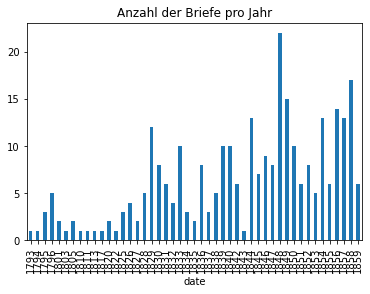

In [108]:
df_grouped_sum = df.groupby(df.loc[:, 'date'].dt.to_period('Y')).size()

df_grouped_sum.plot(kind='bar', title='Anzahl der Briefe pro Jahr');

Im nächsten Beispiel gruppieren wir unsere Daten auch nach der Datumspalte. Diesmal nutzen wir zusätzlich die Spalte mit der Anzahl der Token und wenden darauf die `mean()`-Methode an, um die durchschnittliche Anzahl der Token für das jeweilige Jahr zu erhalten. Der Code für das Balkendiagramm wenden wir wie bei den vorherigen Diagrammen an.

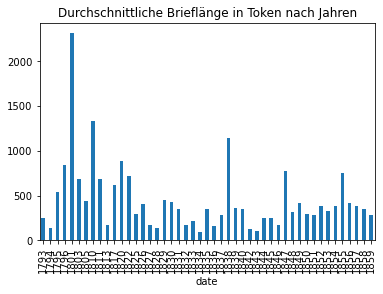

In [107]:
df_grouped_token = df.groupby(df.loc[:, 'date'].dt.to_period('Y'))['nr_token'].mean()

df_grouped_token.plot(kind='bar', title='Durchschnittliche Brieflänge in Token nach Jahren');

## Abfrage mit boolescher Maske

Ein weiterer Schritt bei der Exploration der Daten können Abfragen nach bestimmten Wörtern in den textuellen Daten sein. Hier hilft eine Reihe von Methoden, die in pandas speziell für die Arbeit mit Strings existieren und mit dem Kürzel `str` eingeleitet werden (siehe auch die [Dokumentation](https://pandas.pydata.org/docs/user_guide/text.html#string-methods) hierzu). Die Methode `str.contains()` prüft, ob eine Zeichenkette in einem String enthalten. Nachfolgend haben wir die Methode auf die Spalte mit den Texten der Briefe angewandt und suchen hier nach dem String 'Vulkan'. 

Diese Suchfunktionalität ermöglicht auch den Einsatz von Regulären Ausdrücken, die wir im entsprechenden Kapitel genauer vorstellen werden. Hier erfolg durch die Syntax '[V|v]', dass sowohl nach dem Wort in Groß- und Kleinschreibung gesucht wird. In der dritten Variante wird dann sogar nach den Schreibvarianten mit k bzw. c gesucht. Wir erhalten hier  17 Treffer des Wortes 'Vulkan' und dessen Variante, die in den Brieftexten vorkommen. Diese Briefe filtern wir mit Hilfe der booleschen Maskierung. 

In [109]:
query_1 = df.loc[:, 'text'].str.contains('Vulkan').sum()
query_1

6

In [110]:
query_2 = df.loc[:, 'text'].str.contains('[V|v]ulkan').sum()
query_2

14

In [111]:
query_3 = df.loc[:, 'text'].str.contains('[V|v]ul[c|k]an').sum()
query_3

17

In [113]:
mask = df.loc[:, 'text'].str.contains('[V|v]ul[c|k]an')
df_vulkan = df.loc[mask, :]

print(df_vulkan.shape)
df_vulkan.head(3)

(17, 12)


,reference,edition_id,sender_id,sender,receiver_id,receiver,date,place_id,place,text,token,nr_token
9,https://edition-humboldt.de/H0001199,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/117387436,Karl Ludwig Willdenow,1796-12-20,http://sws.geonames.org/2951825,Bayreuth,Ohnerachtet mich meine Sendung zu dem französi...,"[ohnerachtet, mich, meine, sendung, zu, dem, f...",290
10,https://edition-humboldt.de/H0001181,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/117387436,Karl Ludwig Willdenow,1801-02-21,http://sws.geonames.org/3553478,Havanna,"Havana , den 21 . Febr. Februar 1801. Mein brü...","[havana, den, 21, febr, februar, 1801, mein, b...",4347
50,https://edition-humboldt.de/H0019581,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118750321,Johann Moritz Rugendas,1830-03-08,http://sws.geonames.org/2950159,None,"Sie sind zu sehr, mein theurer Rugendas , von ...","[sie, sind, zu, sehr, mein, theurer, rugendas,...",752


In dieser Auswahl können wir nun bspw. weitergehend erkunden, wer die Empfänger der Briefe sind, in denen das Wort Vulkan vorkommt. Mit zwei weiteren Zeilen Code können wir auch das Ergebnis schnell visualisieren.

In [115]:
print(df_vulkan.loc[:, 'receiver'].nunique())
df_vulkan.loc[:, 'receiver'].unique()

5


array(['Karl Ludwig Willdenow', 'Johann Moritz Rugendas',
       'Franz Julius Ferdinand Meyen', 'Alexander von Humboldt',
       'Christian Gottfried Ehrenberg'], dtype=object)

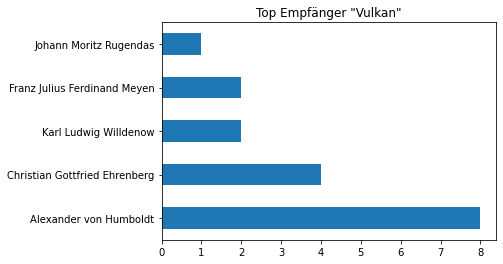

In [94]:
top_receiver = df_vulkan.loc[:, 'receiver'].value_counts()

top_receiver.plot(kind='barh', title='Top Empfänger "Vulkan"');

Auch die `pd.crosstab()`-Methode kann ähnlich eingesetzt werden wie `groupby()`. Hier setzen wir den Index eines neuen Dataframes auf die Datumsangaben und fügen dann die Spalte `count` hinzu, in der die Häufigkeit der Vorkommnisse für die Jahre gezählt werden. Da nicht in jedem Jahr das Wort 'Vulkan' Erwähnung findet, sind im anschließenden Diagramme nur die Jahre aufgeführt, in denen mindestens einmal das Wort in einem der Briefe, die in diesem Jahr verfasst wurden, zu finden ist. Das ist für eine Visualisierung unvorteilhaft. Aber dies kann alles angepasst werden. Genauso wie fehlende Beschriftungen wie auch die Kommawerte in den Label der y-Achse. Wie die Visualisierung der Daten verbessert werden, kann werden wir im nächsten Kaptiel ausführen. Hier werden eigene Python-Bibliotheken zum Plotten zum Einsatz kommen. 

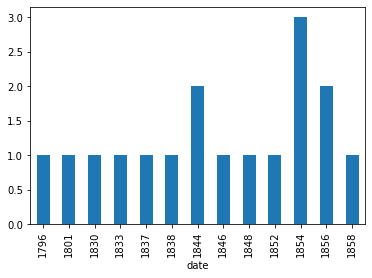

In [121]:
df_vulkan_year = pd.crosstab(index=df_vulkan.loc[:,'date'].dt.to_period('Y'), columns='count')
df_vulkan_year.plot(kind='bar', legend=False);